# Taller Vecinos más cercanos (KNN)

Usamos el método de vecinos más cercanos para clasificación. Por un lado, analizamos el Iris Dataset sobre especies de flores. Por el otro lado analizamos la supervivencia en la tragedia del Titanic utilizando diferentes valores de K. 

Importamos primero las librerías y paquetes que utilizaremos. Puede importar otros si lo considera útil.

In [1]:
#importar paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Iris Dataset

Importamos el conjunto de datos desde sklearn.




In [2]:
#importar dataset
from sklearn.datasets import load_iris

In [3]:
#Importar iris dataset y separar en data y target
iris = load_iris()
X=pd.DataFrame(iris.data)
y=pd.DataFrame(iris.target)

Primero separamos el conjunto de datos en Train y Test, en una proporción de 70%, 30%.

In [4]:
#Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=0, shuffle=True)

Importamos el classificador KNeighborsClassifier de SKLearn con el nombre *knn*. Usar k=3.


In [5]:
#TODO1 importar KNeighborsClassifier con k=3 con el nombre knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)


Entrenamos el clasificador con los datos de entrenamiento.

In [6]:
#TODO2 entrenar knn con los datos de entrenamiento
knn.fit(X_train, y_train)


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

Calculamos la exactitud del modelo en los datos Test, con el método *score* del clasificador.

In [7]:
#TODO3 calcular la exactitud (score) del modelo en los datos test.

print("R²:", knn.score(X_train, y_train))

R²: 0.9619047619047619


**TODO 4**: Observe los diagramas de dispersión del Iris datset [aquí](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris).¿Cree que la exactitud mejorará con un k más pequeño?¿Cree que mejorará con un K más grande? ¿Por qué? 

- Dado que están muy bien agrupados dentro de sus clusters puede que aumentar el número de vecinos no suena a muy buena idea, por que pueden empezar a tenerse más encuenta los pesos de otros clusters.

## Titanic Dataset
Ahora analizamos la supervivencia en el naufragio del Titanic. El conjunto de datos, así como el diccionario de atributos, puede verlos [aquí](https://www.kaggle.com/competitions/titanic/data).

*Observación* Usaremos sólo el conjunto Train proporcionado en Kaggle para la fase Test y Train en el taller.

In [8]:
#importar los datos de entrenamiento del Titanic Dataset.
df=pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Eliminar del dataframe las filas con valores ausentes (NaN).

In [9]:
#TODO5 Remover filas con valores ausentes.
df = df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Explorar el dataset mediante su visualización, el uso de los métodos *head*, *info* y *value_counts* para los Dataframes en pandas y sus columnas. ¿Qué tipo de variables tiene? qué caracteriza a los valores de dichas variables? ¿Qué tipos de datos se usan?

- Tiene variables cuantitativas y cualitativas, algunas variables son binarias como por ejemplo 'sex', y otras tienen todos los valores diferentes como 'Cabin'.

In [10]:
#TODO6 Explorar el dataset
print(df.info())
df.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB
None


PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

**TODO7**: ¿Cuáles considera, de acuero a su intuición que son las variables más relevantes para predecir la columna 'Survived'? ¿Cuáles considera irrelevantes?¿Por qué?

Consideramos que las variables más relevantes son, Age, Sex, SibSp, Parch, Pclass. Por que se evacuan primero las mujeres y niños, nos parece interensante, SibSp, Parch por que es la cantidad de relativos que tiene la persona, por lo que podrían llegar a ser de ayuda en el proceso de evacuación.

Adicionalmente nos parece interesante ver si la clase del pasajero tiene un peso en su supervivencia.

- 'Ticket', 'Fare', 'Embarked', 'PassangerId', 'Name', 'Cabin', no las consideramos significativas.


In [11]:
#Separar la columna objetivo.
X=df.drop('Survived',axis=1)
y=df['Survived']

In [12]:
#TODO8 Remover columnas que usted considera irrelevantes.
X=X.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Embarked', 'Cabin'],axis=1)

Convertimos a dummies las columnas categóricas. Nos aseguramos de que las originales no permanezcan en la tabla. Se sugiere usar el parámetro drop_first = True si está trabajando con Getdummies. ¿Por qué cree que es conveniente usar este parámetro?

- Para tener menos cantidad de categorías, y eso puede facilitar la clasificación.
Por ejemplo, si tenemos una variable categórica "color" con tres categorías: "rojo", "verde" y "azul", y creamos columnas separadas para cada una, "rojo" y "verde" pueden ser suficientes para inferir que la tercera categoría es "azul", por lo que la columna "azul" se vuelve redundante. Al eliminar la primera columna de cada conjunto de columnas dummies, se evita esta redundancia y se reduce la multicolinealidad.

In [13]:
#TODO9 Convertir a dummies. Asegurarse de eliminar las columnas originales. Se sugiere usar el parámetro drop_first=True si se está trabajando con getdummies.
X = pd.get_dummies(X, columns=["Pclass", "Sex"], drop_first = True)

In [14]:
#Imprimir info de X
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         183 non-null    float64
 1   SibSp       183 non-null    int64  
 2   Parch       183 non-null    int64  
 3   Pclass_1    183 non-null    uint8  
 4   Pclass_2    183 non-null    uint8  
 5   Pclass_3    183 non-null    uint8  
 6   Sex_female  183 non-null    uint8  
 7   Sex_male    183 non-null    uint8  
dtypes: float64(1), int64(2), uint8(5)
memory usage: 6.6 KB


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.2, shuffle=True)

In [16]:
def all_in_one(data: pd.DataFrame,
               used_vars = [],
               unused_vars = [], 
               dummies = [], 
               outcome = 'Survived'):


    data = data.dropna()

    #selects the features we care about
    if len(used_vars) > 0:
        X  = data[used_vars]

    elif len(unused_vars) > 0:
        X = data.drop(columns = unused_vars + [outcome], axis=1)

    else:
        return 

    y  = data[outcome]

    #converts to dummy variable
    X = pd.get_dummies(X, columns = dummies, drop_first = True)

    #splits the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.2, shuffle=True)

    return (X_train, X_test, y_train, y_test)
    


Ahora entrenamos clasificadores de KNN con diferentes valores de k y visualizamos el cambio entre ellos.

In [28]:
#TODO10 para k entre 1 y 100, entrenar knn en los datos de entrenamiento. Calcular sus respectivos scores
# Guardar los scores en una lista llamada "scores".
df=pd.read_csv("train.csv")

X_train, X_test, y_train, y_test = all_in_one(df, 
                                              used_vars=['Age', 'Sex','SibSp', 'Parch', 'Pclass'], 
                                              dummies=['Age', 'Sex'])

kn_max = 100
scores_train = np.zeros(kn_max)
scores_test  = np.zeros(kn_max)

for kn in range(1, kn_max+1):
    knn = KNeighborsClassifier(n_neighbors = kn)
    knn.fit(X_train, y_train)

    scores_train[kn-1] = knn.score(X_train, y_train)
    scores_test[kn-1]  = knn.score(X_test, y_test)


print('El máximo es: ', np.max(scores_test, axis=0))
print('El mínimo es: ', np.min(scores_test, axis=0))
print('El promedio es: ', np.mean(scores_test))

El máximo es:  0.8648648648648649
El mínimo es:  0.6216216216216216
El promedio es:  0.812162162162162


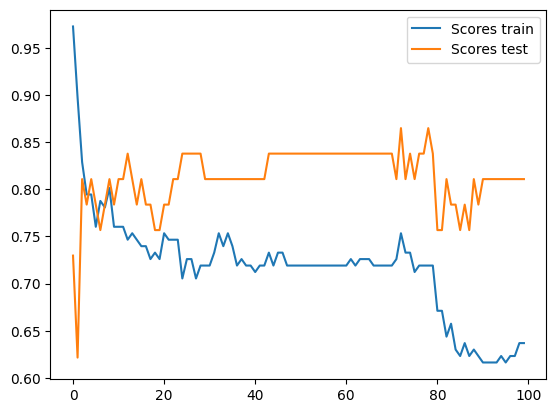

In [18]:
#Graficar scores
plt.plot(scores_train)
plt.plot(scores_test)
plt.legend(["Scores train", "Scores test"])
plt.show()

**TODO11** ¿Qué se puede concluir a partir de la gráfica anterior?

A partir de un k = 23 vecinos no hay un cambio drástico en el Score test, además las variables relevantes elegidas parecen ser medianamente adecuadas. 

**TODO12:** Determinar si las siguientes afirmaciones son verdaderas o falsas. Justificar su respuesta.

- El score en el test set de 1-NN siempre será menor o igual que el de 5-NN.
***En este caso si.***

- El tiempo para clasificar una muestra del testset con k-NN crece con el tamaño del train set. 
***Si, ya que tiene que computar la distancia a más puntos.***

## Titanic dataset usando pesos en la distancia.

A continuación usamos clasificadores de KNN dándole pesos a las distancias. 

**TODO13:** ¿Nota alguna diferencia con la clasificación sin pesos en las distancias? ¿Alguna hipótesis sobre el porqué?

- Podemos notar que el promedio con la clasificación sin pesos en las distancias es de 0.8121, y con pesos de 0.8397, es decir con pesos rinde mejor.

- El mínimo usando pesos, es más grande que el mínimo sin pesos.

- Por otro lado, el máximo es igual tanto con pesos y sin pesos.

Parece que darle más peso a los vecinos más cercanos mejora la predicción.

In [24]:
# Weighted k-nn
scores=[]
for n in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=n, weights='distance')
  knn.fit(X_train,y_train)
  s=knn.score(X_test,y_test)
  scores.append(s)

print('El máximo es: ', np.max(scores, axis=0))
print('El mínimo es: ', np.min(scores, axis=0))
print('El promedio es: ', np.mean(scores))

El máximo es:  0.8648648648648649
El mínimo es:  0.7297297297297297
El promedio es:  0.83974883974884


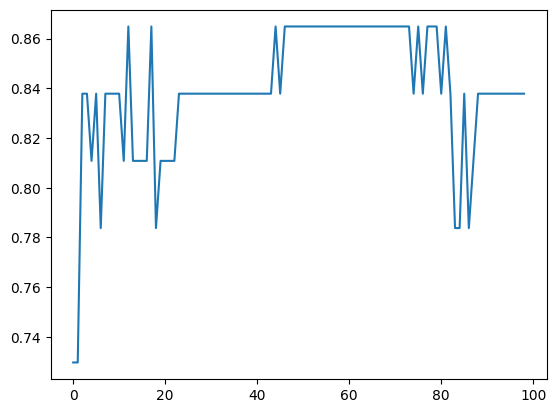

In [20]:
#Graficar
plt.plot(scores)

In [ ]:


df_1 = _deepnote_execute_sql("""SELECT *
FROM 'train.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_1

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=30916fdd-4d74-4b41-bb09-340bc04a4b90' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>